In [1]:
from tensorflow import keras
from keras.datasets import mnist, fashion_mnist
from keras import layers, Model
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Тренируем модельки на MNIST

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_train_images.shape, mnist_train_labels.shape, mnist_test_images.shape, mnist_test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
mnist_train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
mnist_train_labels[0]

5

In [5]:
# Normalize pixel values to be between 0 and 1
mnist_train_images = mnist_train_images.astype("float32") / 255.0
mnist_test_images = mnist_test_images.astype("float32") / 255.0

mnist_train_images = np.expand_dims(mnist_train_images, -1)
mnist_test_images = np.expand_dims(mnist_test_images, -1)
mnist_train_images[0][14][14]

array([0.9411765], dtype=float32)

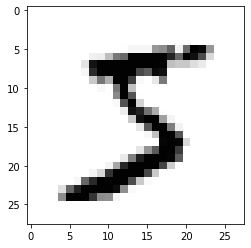

In [6]:
plt.imshow(mnist_train_images[0], cmap = 'Greys')
plt.show()

In [7]:
LeNet_model = keras.Sequential([
    layers.Input(shape = (28, 28, 1)),
    layers.Conv2D(filters=6, kernel_size=[5, 5], padding='same', activation='tanh'),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Conv2D(filters=16, kernel_size=[5, 5], padding='valid', activation='tanh'),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(units=120, activation='tanh'),
    layers.Dense(units=84, activation='tanh'),
    layers.Dense(units=10, activation='softmax')
])

dummy_model = keras.Sequential([
    layers.Input(shape = (28, 28, 1)),
    layers.Conv2D(filters=6, kernel_size=[5, 5], padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=3, strides=3),
    layers.Flatten(),
    layers.Dense(units=10, activation='softmax')
])

wise_model = keras.Sequential([
    layers.Input(shape = (28, 28, 1)),
    layers.Conv2D(filters=6, kernel_size=[3, 3], padding='valid', activation='relu'),
    layers.Conv2D(filters=6, kernel_size=[3, 3], padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=3, strides=3),
    layers.Flatten(),
    layers.Dense(units=10, activation='softmax')
])

2022-05-25 02:22:12.149123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
def test_model(model: Model):  # returns history
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x=mnist_train_images,
        y=mnist_train_labels,
        epochs=10,
        validation_data=(mnist_test_images, mnist_test_labels)
    )
    model.summary()
    return history

In [9]:
mnist_train_labels = to_categorical(mnist_train_labels)
mnist_test_labels = to_categorical(mnist_test_labels)
mnist_train_labels.shape, mnist_train_labels

((60000, 10),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [10]:
history_LeNet = test_model(LeNet_model)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1580 - accuracy: 0.9536 - val_loss: 0.0688 - val_accuracy: 0.9784
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0589 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0488 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0508 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0582 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0399 -

In [11]:
history_dummy_model = test_model(dummy_model)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3822 - accuracy: 0.8911 - val_loss: 0.1749 - val_accuracy: 0.9510
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1465 - accuracy: 0.9578 - val_loss: 0.1067 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1008 - accuracy: 0.9710 - val_loss: 0.0894 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0832 - accuracy: 0.9756 - val_loss: 0.0715 - val_accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0730 - accuracy: 0.9782 - val_loss: 0.0674 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0665 - accuracy: 0.9803 - val_loss: 0.0613 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0613 - accuracy: 0.9817 - val_loss: 0.0538 - val_accuracy:

In [12]:
history_wise_model = test_model(wise_model)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2968 - accuracy: 0.9114 - val_loss: 0.1454 - val_accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1246 - accuracy: 0.9626 - val_loss: 0.0981 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0936 - accuracy: 0.9717 - val_loss: 0.0757 - val_accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0800 - accuracy: 0.9752 - val_loss: 0.0775 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0708 - accuracy: 0.9789 - val_loss: 0.0644 - val_accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0647 - accuracy: 0.9806 - val_loss: 0.0647 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0606 - accuracy: 0.9821 - val_loss: 0.0612 - v

In [13]:
for model in [history_LeNet, history_dummy_model, history_wise_model]:
    print(f'LeNet Model : best accuracy {max(model.history["accuracy"])}')

LeNet Model : best accuracy 0.9971666932106018
LeNet Model : best accuracy 0.9837499856948853
LeNet Model : best accuracy 0.9842666387557983


# Тренируем модельки на Fashion-MNIST

In [14]:
(fashion_mnist_train_images, fashion_mnist_train_labels), (fashion_mnist_test_images, fashion_mnist_test_labels) = fashion_mnist.load_data()
fashion_mnist_train_images.shape, fashion_mnist_train_labels.shape, fashion_mnist_test_images.shape, fashion_mnist_test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [15]:
fashion_mnist_train_images = fashion_mnist_train_images.astype("float32") / 255.0
fashion_mnist_test_images = fashion_mnist_test_images.astype("float32") / 255.0

fashion_mnist_train_images = np.expand_dims(fashion_mnist_train_images, -1)
fashion_mnist_test_images = np.expand_dims(fashion_mnist_test_images, -1)

In [16]:
fashion_mnist_test_labels_categorical = fashion_mnist_test_labels

fashion_mnist_train_labels = to_categorical(fashion_mnist_train_labels)
fashion_mnist_test_labels = to_categorical(fashion_mnist_test_labels)

In [17]:
history_fashion = LeNet_model.fit(
    x=fashion_mnist_train_images,
    y=fashion_mnist_train_labels,
    epochs=10,
    validation_data=(fashion_mnist_test_images, fashion_mnist_test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5252 - accuracy: 0.8120 - val_loss: 0.4267 - val_accuracy: 0.8461
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3709 - accuracy: 0.8651 - val_loss: 0.3638 - val_accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3288 - accuracy: 0.8798 - val_loss: 0.3609 - val_accuracy: 0.8712
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3022 - accuracy: 0.8874 - val_loss: 0.3254 - val_accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2869 - accuracy: 0.8935 - val_loss: 0.3366 - val_accuracy: 0.8820
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2675 - accuracy: 0.9005 - val_loss: 0.3342 - val_accuracy: 0.8826
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2576 - accuracy: 0.9042 - val_loss: 0.3162 - 

In [18]:
print(f'FASHION LeNet Model : best accuracy {max(history_fashion.history["accuracy"])}')

FASHION LeNet Model : best accuracy 0.9162499904632568


In [19]:
model_predictions = LeNet_model.predict(fashion_mnist_test_images)
resulted = list(map(np.argmax, model_predictions))

# строка - test, столбец - pred
confusion_matrix(fashion_mnist_test_labels_categorical, resulted)

313/313 [==============================] - 1s 4ms/step


array([[780,   0,  35,  15,   3,   1, 153,   0,  13,   0],
       [  8, 959,   2,  17,   4,   0,   8,   0,   2,   0],
       [  9,   0, 872,   5,  57,   0,  51,   0,   6,   0],
       [ 14,   1,  35, 858,  40,   0,  47,   0,   5,   0],
       [  1,   1, 122,  16, 789,   0,  63,   0,   8,   0],
       [  0,   0,   0,   1,   0, 976,   0,  14,   3,   6],
       [ 75,   0, 107,  20,  56,   0, 726,   0,  16,   0],
       [  0,   0,   0,   0,   0,  23,   0, 963,   1,  13],
       [  2,   1,   5,   1,   3,   1,   2,   2, 983,   0],
       [  0,   0,   0,   0,   0,   4,   0,  37,   1, 958]])

In [20]:
image_matrix = []
probability_matrix = []

for i in range(10):
    image_matrix.append([0] * 10)
    probability_matrix.append([0] * 10)

for obj_ind in range(len(fashion_mnist_test_images)):
    obj_class = fashion_mnist_test_labels_categorical[obj_ind]
    for clazz in range(10):
        model_predict = model_predictions[obj_ind][clazz]
        if model_predict > probability_matrix[obj_class][clazz]:
            probability_matrix[obj_class][clazz] = model_predict
            image_matrix[obj_class][clazz] = obj_ind

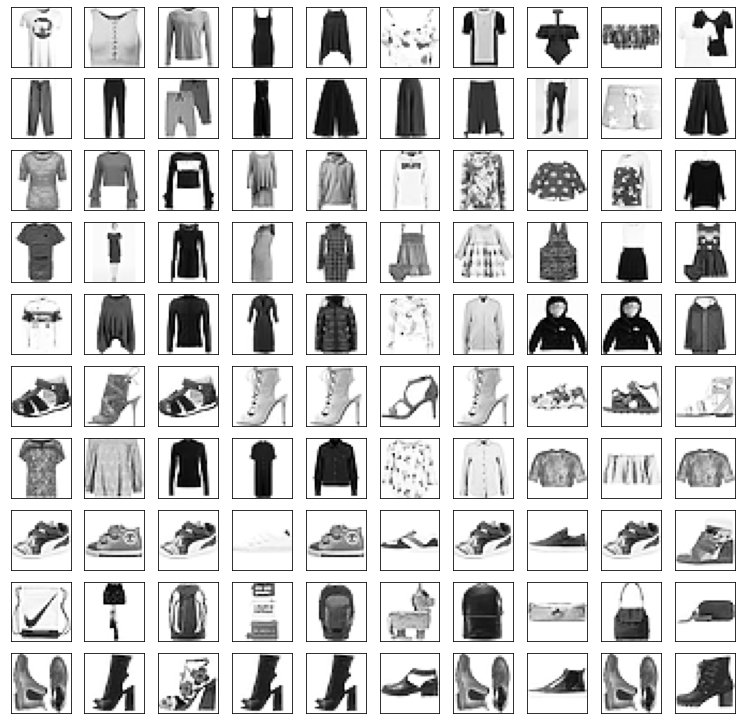

In [21]:
plt.figure(figsize = (13, 13))

for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    row = i // 10
    column = i % 10
    image = fashion_mnist_test_images[image_matrix[row][column]]

    plt.imshow(image, cmap = "Greys")

# 0 - Футболки
# 1 - Шорты
# 2 - Свитера
# 3 - Платья
# 4 - Плащи
# 5 - Сандали
# 6 - Рубашки
# 7 - Кроссовки
# 8 - Сумки
# 9 - Ботинки

plt.show()